# Memahami Perjalanan dari Loop ke Bandara Internasional O'Hare saat Kondisi Cuaca Hujan Pada hari Sabtu

## Pendahuluan
Dalam project ini, kita akan melakukan analisis data eksploratif dan pengujian hipotesis menggunakan Python untuk memahami dan menguji perubahan dalam durasi perjalanan dari Loop ke Bandara Internasional O'Hare, khususnya pada hari Sabtu saat kondisi cuaca hujan. Dengan langkah-langkah yang terstruktur, kami akan mengeksplorasi data, merumuskan hipotesis, dan melakukan pengujian statistik untuk menentukan apakah perubahan yang signifikan terjadi, dan mengambil kesimpulan berdasarkan temuan kami. Proyek ini bertujuan untuk memahami pengaruh kondisi cuaca terhadap perjalanan menuju bandara dan dapat memberikan wawasan yang berharga bagi industri transportasi dan pengguna jasa transportasi.

### Tujuan
Project ini merupakan hasil dari SQL yang akan dianalisis menggunakan Python. Tujuan dari proyek ini adalah untuk memahami apakah terdapat perubahan signifikan dalam durasi perjalanan dari Loop ke Bandara Internasional O'Hare saat kondisi cuaca hujan pada hari Sabtu. Project ini bertujuan untuk menguji hipotesis mengenai pengaruh kondisi cuaca terhadap perjalanan ke bandara dan memberikan wawasan yang berguna dalam industri transportasi.

### Tahapan
1. Analisis data eksploratif (Python) dengan memuat dataset: `/datasets/project_sql_result_01.csv` dan `/datasets/project_sql_result_04.csv` 
   - Terdapat Sub tahapan antara lain:
  
         1  Mempelajari isi data.
         2  Memastikan tipe datanya sudah benar.
         3  Mengidentifikasi 10 wilayah teratas yang dijadikan sebagai titik pengantaran.
         4  Membuat grafik: perusahaan taksi dan jumlah perjalanannya, 10 wilayah teratas berdasarkan jumlah pengantaran.
         5  Menarik kesimpulan berdasarkan grafik yang sudah dibuat dan menjelaskan hasilnya.


2. Menguji hipotesis (Python) dengan memuat dataset: `/datasets/project_sql_result_07.csv`


---------------

## Inisialisasi
- Kita akan memuat library apa saja yang akan kita gunakan.

In [27]:
# list library yang digunakan
from scipy import stats
from scipy.stats import levene
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


--------

## Memuat Data
- Memuat dataset yang akan kita kerjakan.

In [3]:
# Memuat dataset yang akan kita gunakan
exploration1 = pd.read_csv('/datasets/project_sql_result_01.csv')
exploration2 = pd.read_csv('/datasets/project_sql_result_04.csv')
hypothesis = pd.read_csv('/datasets/project_sql_result_07.csv')


---------

## Analisis data eksploratif (khusus untuk dataset exploration)
- Mari kita lihat isi dari data yang telah dimuat. Yaitu hanya variable exploration1 dan exploration2 yang akan kita gunakan.

### Mempelajari Isi Data (khusus untuk dataset exploration)
- Mari kita tampilkan jumlah data yang dimiliki serta informasi yang akan kita tinjau.

In [4]:
# Menampilkan informasi hasil sql 01
exploration1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Menampilkan informasi hasil sql 04
exploration2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- <font color='green'>Temuan</font>

Tidak ada nilai yang hilang dari informasi yang tersedia.

In [6]:
# Menampilkan data hasil sql 01
exploration1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [7]:
# Memuat menampilkan data hasil sql 04
exploration2.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


- <font color='green'>Kesimpulan Sementara</font>

Untuk saat ini tidak ditemukan nilai yang kosong. Seluruh data benar-benar utuh.

----------

### Memastikan tipe datanya sudah benar (khusus untuk data exploration)
- Mari kita periksa kembali tipe data yang ada.

In [8]:
# Menampilkan informasi hasil sql 01
exploration1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
# Menampilkan informasi hasil sql 04
exploration2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


- <font color='green'>Kesimpulan Sementara</font>

Tipe data bisa saja sudah sesuai. Kita harus analisa lebih lanjut.

------------

### Mengidentifikasi 10 Wilayah Teratas yang Dijadikan Sebagai Titik Pengantaran (khusus untuk data exploration)

- Kita akan identifikasikan 10 wilayah dengan dataset yang kita tentukan yang bervariable exploration1 dan exploration2.

#### 10 Wilayah Teratas Untuk DataFrame exploration1

- Kita akan menggunakan dataset pertama yaitu exploration1.

In [10]:
# preview data exploration1
exploration1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


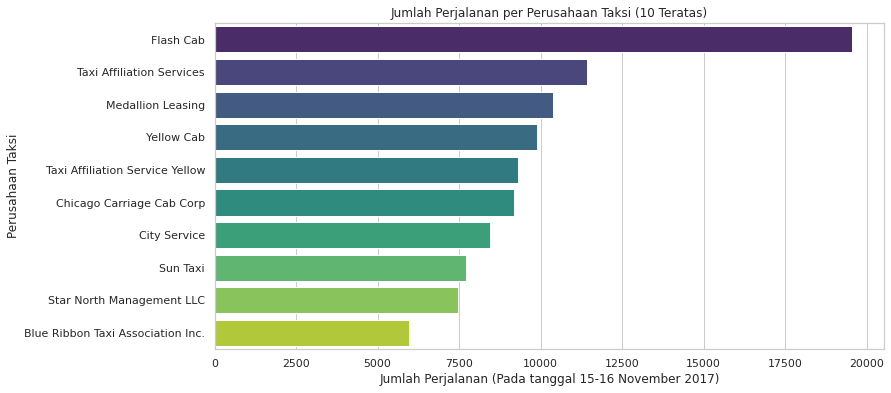

In [11]:
# Pilih 10 perusahaan taksi teratas
top_10_companies = exploration1.head(10)

# Atur gaya plot dengan Seaborn
sns.set(style="whitegrid")

# Membuat grafik batang dengan palet "viridis" dari Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='trips_amount', y='company_name', data=top_10_companies, palette='viridis')
plt.title("Jumlah Perjalanan per Perusahaan Taksi (10 Teratas)")
plt.xlabel('Jumlah Perjalanan (Pada tanggal 15-16 November 2017)')
plt.ylabel('Perusahaan Taksi')
plt.show()

- <font color='green'>Kesimpulan Sementara</font>

Jumlah Perjalanan pada tanggal 15-16 November 2017 di 10 teratas adalah:

1. Flash Cab
2. Taxi Affiliation Services
3. Medallion Leasing
4. Yellow Cab
5. Taxi Affiliation Service Yellow
6. Chicago Carriage Cab Corp
7. City Service
8. Sun Taxi
9. Star North Management LLC
10. Blue Ribbon Taxi Association Inc.
    

------------

####  10 Wilayah Teratas Untuk DataFrame exploration2

In [12]:
# preview data exploration2
exploration2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


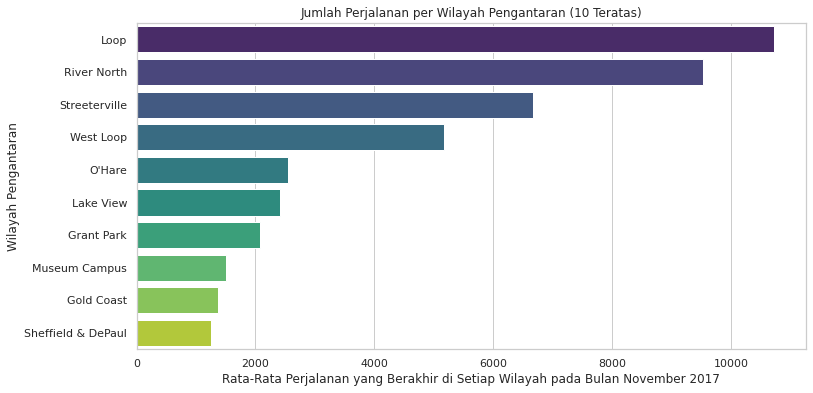

In [13]:
# Pilih 10 wilayah teratas
top_10_locations = exploration2.head(10)

# Atur gaya plot dengan Seaborn
sns.set(style="whitegrid")

# Membuat grafik batang dengan palet "viridis" dari Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_locations, palette='viridis')
plt.title("Jumlah Perjalanan per Wilayah Pengantaran (10 Teratas)")
plt.xlabel('Rata-Rata Perjalanan yang Berakhir di Setiap Wilayah pada Bulan November 2017')
plt.ylabel('Wilayah Pengantaran')
plt.show()

- <font color='green'>Kesimpulan Sementara</font>

Rata-Rata Perjalanan yang Berakhir di Setiap Wilayah pada Bulan November 2017 adalah:

1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & Depaul
    

----------------

## Menguji Hipotesis (khusus untuk data hypothesis)
- `/datasets/project_sql_result_07.csv` merupakan hasil dari kueri terakhir yang bervariable yaitu hypothesis . File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare. 

### Mempelajari Isi Data (khusus untuk data hypothesis)
- Mari kita periksa informasi dan muatan data pada dataset tersebut.

In [14]:
# Menampilkan isi dataset sql result 07
hypothesis.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


 - <font color='green'>Temuan</font>

Kita mungkin akan mengubah dengan tipe data yang sesuai, melihat isi dataset tersebut. Di dalam dataset ini deskripsi tersebut untuk hypothesis yaitu:

**start_ts -- tanggal dan waktu penjemputan**

**weather_conditions -- kondisi cuaca saat perjalanan dimulai**

**duration_seconds -- durasi perjalanan dalam satuan detik**

### Memastikan Tipe Data Sudah Benar (khusus untuk data hypothesis)

In [15]:
# Menampilkan informasi dataset sql result 07
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


- <font color='green'>Temuan</font>

Kita akan mengubah tipe data untuk kolom start_ts dan duration_seconds sebagai tipe data yang sesuai. Selain itu tidak ada data yang hilang untuk dataset tersebut.

In [16]:
# Mengubah tipe data start_ts ke datetime
hypothesis['start_ts'] = pd.to_datetime(hypothesis['start_ts'])

In [17]:
# Mengubah tipe data duration_seconds menjadi int
hypothesis['duration_seconds'] = hypothesis['duration_seconds'].astype('int')

In [18]:
# Menampilkan informasi dataset sql result 07 dengan data yang telah diubah
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


In [19]:
# Hasil informasi
hypothesis.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320
6,2017-11-04 16:00:00,Bad,2969
7,2017-11-18 11:00:00,Good,2280
8,2017-11-11 14:00:00,Good,2460
9,2017-11-11 12:00:00,Good,2040


- Mari kita uji dengan data yang sudah kita perbaiki.

### Menguji H0 dan H1 untuk Dataset Hypothesis

Uji hipotesis berikut:
"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu." 


Yang berarti:

<font color = 'green'>Alpha yang ditentukan yaitu 5% atau 0.05</font>

<font color='blue'>H0 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK SAMA saat hujan di hari Sabtu."</font>

<font color='red'>H1 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare SAMA saat hujan di hari Sabtu."</font>

In [20]:
# Preview dataset hypothesis
hypothesis.head(50)


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
5,2017-11-11 04:00:00,Good,1320
6,2017-11-04 16:00:00,Bad,2969
7,2017-11-18 11:00:00,Good,2280
8,2017-11-11 14:00:00,Good,2460
9,2017-11-11 12:00:00,Good,2040


In [21]:
# mempersiapkan perhitungan data varians
# hitung rata-rata pada dataset
avg_hypothesis = pd.pivot_table(hypothesis, index='weather_conditions',  values='duration_seconds', aggfunc='mean').reset_index()
avg_hypothesis

,weather_conditions,duration_seconds
0,Bad,2427.205556
1,Good,1999.675676


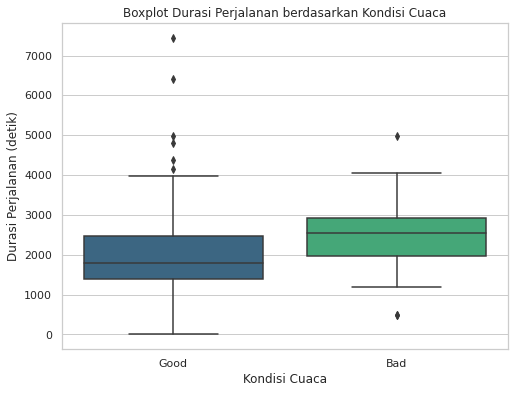

In [22]:
# Data agregat (data asli)
avg_hypothesis = pd.pivot_table(hypothesis, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()

# Buat boxplot dengan Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=hypothesis, palette='viridis')

# Tambahkan judul dan label sumbu
plt.title("Boxplot Durasi Perjalanan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Durasi Perjalanan (detik)")

plt.show()

- <font color = 'green'> Kesimpulan Sementara </font>

Terlihat bahwa nilai Good memiliki data yang condong ke kanan dab memilki banyak nilai outliers. Sedangkan nilai Bad berada di sekitar interquartile range yang mengindikasikan bahwa banyak data yang terdistribusi di dalam visualisasi boxplot tersebut.

In [23]:
# Melakukan penghapusan outliers
Q1 = hypothesis['duration_seconds'].quantile(0.25)
Q3 = hypothesis['duration_seconds'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outliers
hypothesis_no_outliers = hypothesis[(hypothesis['duration_seconds'] >= lower_bound) & (hypothesis['duration_seconds'] <= upper_bound)]


In [24]:
# Agregasi tanpa outliers
hypothesis_no_outliers_avg = pd.pivot_table(hypothesis_no_outliers, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()
hypothesis_no_outliers_avg

,weather_conditions,duration_seconds
0,Bad,2412.944134
1,Good,1979.266138


- Bisa kita lihat, perubahan data tidak begitu signifikan. Namun kita akan tetap lakukan dengan menggunakan data yang tidak ada outliers nya untuk menguji hypothesis.

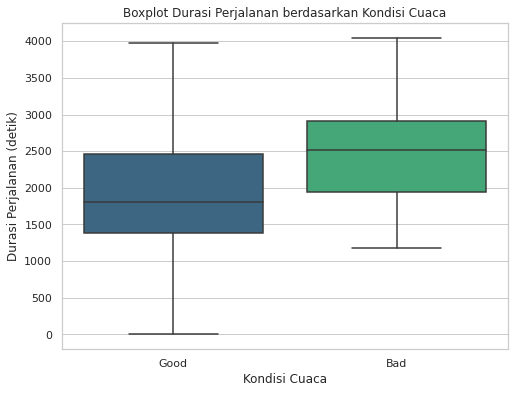

In [25]:
# Data agregat tanpa outliers
hypothesis_no_outliers_avg = pd.pivot_table(hypothesis_no_outliers, index='weather_conditions', values='duration_seconds', aggfunc='mean').reset_index()
# Buat boxplot dengan Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', data=hypothesis_no_outliers, palette='viridis', showfliers=False)

# Tambahkan judul dan label sumbu
plt.title("Boxplot Durasi Perjalanan berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Durasi Perjalanan (detik)")

plt.show()

- Di sini kita akan menghapus outliers yang terdapat pada visualisasi boxplot yang sudah kita tampilkan. Hal ini bertujuan agar perhitungan uji testing hypothesis lebih akurat.

<font color = 'green'>Alpha yang ditentukan yaitu 5% atau 0.05</font>

<font color='blue'>H0 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK BERUBAH saat hujan di hari Sabtu."</font>

<font color='red'>H1 = "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare BERUBAH saat hujan di hari Sabtu."</font>

In [35]:
# Pisahkan data menjadi dua kelompok: "Bad" dan "Good"
data_bad = hypothesis_no_outliers[hypothesis_no_outliers['weather_conditions'] == 'Bad']['duration_seconds']
data_good = hypothesis_no_outliers[hypothesis_no_outliers['weather_conditions'] == 'Good']['duration_seconds']

# Lakukan uji Levene
statistic, p_value_levene = levene(data_bad, data_good)

# Cetak hasil uji Levene
print("Statistic:", statistic)
print("P-Value (Levene):", p_value_levene)

alpha = 0.05

if p_value_levene < alpha:
    print('Menerima H1')
else:
    print('Menerima H0')


Statistic: 0.24647542861629418
P-Value (Levene): 0.6196707782686355
Menerima H0


- Setelah itu kita akan melakukan ttest_ind dengan set parameter equal_var dr hasil levene test, jika varians sama maka set True, dan sebaliknya.

In [36]:
# Lakukan uji Levene
statistic_levene, p_value_levene = stats.levene(data_bad, data_good)

# Cetak hasil uji Levene
print("Levene Statistic:", statistic_levene)
print("P-Value (Levene):", p_value_levene)

# Tentukan tingkat signifikansi (alpha) untuk uji t-test
alpha = 0.05

# Lakukan uji t-test independen dengan parameter equal_var yang disesuaikan
if p_value_levene < alpha:
    t_statistic, p_value_ttest = stats.ttest_ind(data_bad, data_good, equal_var=False)
    print("T-Statistic (Unequal Variance):", t_statistic)
    print("P-Value (T-Test):", p_value_ttest)
    print("Menerima H1: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare BERUBAH saat hujan di hari Sabtu.")
else:
    t_statistic, p_value_ttest = stats.ttest_ind(data_bad, data_good, equal_var=True)
    print("T-Statistic (Equal Variance):", t_statistic)
    print("P-Value (T-Test):", p_value_ttest)
    print("Menerima H0: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK BERUBAH saat hujan di hari Sabtu.")


Levene Statistic: 0.24647542861629418
P-Value (Levene): 0.6196707782686355
T-Statistic (Equal Variance): 7.5110122934882755
P-Value (T-Test): 1.2430038032744411e-13
Menerima H0: Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare TIDAK BERUBAH saat hujan di hari Sabtu.


- <font color = 'green'>Kesimpulan Sementara</font>

Hypothesis menerima H0

---------

## Kesimpulan Umum

- Untuk saat ini tidak ditemukan nilai yang kosong. Seluruh data benar-benar utuh.
- Tipe data bisa saja sudah sesuai. Kita harus analisa lebih lanjut.
- Jumlah Perjalanan pada tanggal 15-16 November 2017 di 10 teratas adalah:
  1. Flash Cab
  2. Taxi Affiliation Services
  3. Medallion Leasing
  4. Yellow Cab
  5. Taxi Affiliation Service Yellow
  6. Chicago Carriage Cab Corp
  7. City Service
  8. Sun Taxi
  9. Star North Management LLC
  10. Blue Ribbon Taxi Association Inc.
- Rata-Rata Perjalanan yang Berakhir di Setiap Wilayah pada Bulan November 2017 adalah:
    1. Loop
    2. River North
    3. Streeterville
    4. West Loop
    5. O'Hare
    6. Lake View
    7. Grant Park
    8. Museum Campus
    9. Gold Coast
    10. Sheffield & Depaul
- Terlihat bahwa nilai Good memiliki data yang condong ke kanan dan memilki banyak nilai outliers. Sedangkan nilai Bad berada di sekitar interquartile range yang mengindikasikan bahwa banyak data yang terdistribusi di dalam visualisasi boxplot tersebut.
- Hypothesis menerima H0